### Assignment 1

Clean Data
Exploratory Analaysis (Basic Analysis)
Pattern Recognition
Analytic Visualisation

Machine Learning
Algorithm Optimisation

Statistical Inference
Predictions 
Information Presentation


## Initialise Libraries and Data

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

In [2]:
data = pd.read_csv('../anime_cleaned.csv')
numeric_data = pd.DataFrame(data[["score", "scored_by_users", "episodes", "year aired", "duration"]])
data.head()

,Unnamed: 0,Unnamed: 0.1,rank,title,score,scored_by_users,type,episodes,status,year aired,...,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
0,0,0,1,Fullmetal Alchemist: Brotherhood,9.15,1704441,TV,64.0,Finished Airing,2009,...,Bones,Manga,"Action, Adventure, Comedy, Drama, Fantasy",Action,Military,Shounen,24,R - 17+ (violence & profanity),3,https://myanimelist.net/anime/5114/Fullmetal_A...
1,1,1,2,Shingeki no Kyojin: The Final Season Part 2,9.12,188373,TV,12.0,Currently Airing,2022,...,MAPPA,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),198,https://myanimelist.net/anime/48583/Shingeki_n...
2,2,2,3,Steins;Gate,9.09,1161139,TV,24.0,Finished Airing,2011,...,White Fox,Visual novel,"Drama, Sci-Fi, Suspense",Drama,Psychological,All,24,PG-13 - Teens 13 or older,13,https://myanimelist.net/anime/9253/Steins_Gate
3,3,3,4,Gintama°,9.09,182120,TV,51.0,Finished Airing,2015,...,Bandai Namco Pictures,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,334,https://myanimelist.net/anime/28977/Gintama°
4,4,4,5,Shingeki no Kyojin Season 3 Part 2,9.08,1195629,TV,10.0,Finished Airing,2019,...,Wit Studio,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),32,https://myanimelist.net/anime/38524/Shingeki_n...


## Basic Analysis

In [3]:
data.info() #info on all columns
data.shape #gets total column/rows
data.describe().round(3) #mean/median/count/etc for all numeric data types
print(data.dtypes) #get all column name and datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3958 entries, 0 to 3957
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3958 non-null   int64  
 1   Unnamed: 0.1     3958 non-null   int64  
 2   rank             3958 non-null   int64  
 3   title            3958 non-null   object 
 4   score            3958 non-null   float64
 5   scored_by_users  3958 non-null   int64  
 6   type             3958 non-null   object 
 7   episodes         3942 non-null   float64
 8   status           3958 non-null   object 
 9   year aired       3958 non-null   int64  
 10  premiered        3958 non-null   object 
 11  broadcast        3958 non-null   object 
 12  producers        3958 non-null   object 
 13  licensors        3958 non-null   object 
 14  studios          3958 non-null   object 
 15  source           3958 non-null   object 
 16  genres           3284 non-null   object 
 17  main genre    

## All Display Functions

In [4]:
#get count of all different unique values in one column
def getCountOfColumn(columnname):
    print("Number of " +columnname + ":", len(data[columnname].unique()))

    print(data[columnname].value_counts())
    sb.catplot(y = columnname, data = data, kind = "count", height = 4)

#compare two colums with heatmap
def compareTwoColumnsHeatMap(column1, column2):
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(data.groupby([column1, column2]).size().unstack(), 
               linewidths = 1, annot = True, annot_kws = {"size": 18}, cmap = "BuGn", fmt='g')
    
#get graph for numeric data    
def getNumericGraphs():
    f, axes = plt.subplots(5, 3, figsize=(18, 24))

    count = 0
    for var in numeric_data:
        sb.boxplot(data = data[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = data[var], ax = axes[count,1])
        sb.violinplot(data = data[var], orient = "h", ax = axes[count,2])
        count += 1
        
def getCorrMatrix():
    # Correlation Matrix
    print(numeric_data.corr())

    # Heatmap of the Correlation Matrix
    f = plt.figure(figsize=(20, 20))
    sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
               annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

<AxesSubplot:xlabel='episodes', ylabel='score'>

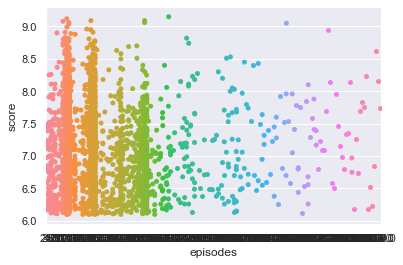

In [5]:
#getCountOfColumn("main genre")
#compareTwoColumnsHeatMap("main genre", "demographic")
sb.stripplot(x = 'episodes', y = 'score', data = data)
#sb.catplot(x = 'Age', y = 'Rating', row = 'Gender', data = creditData, kind = 'box', aspect = 4)

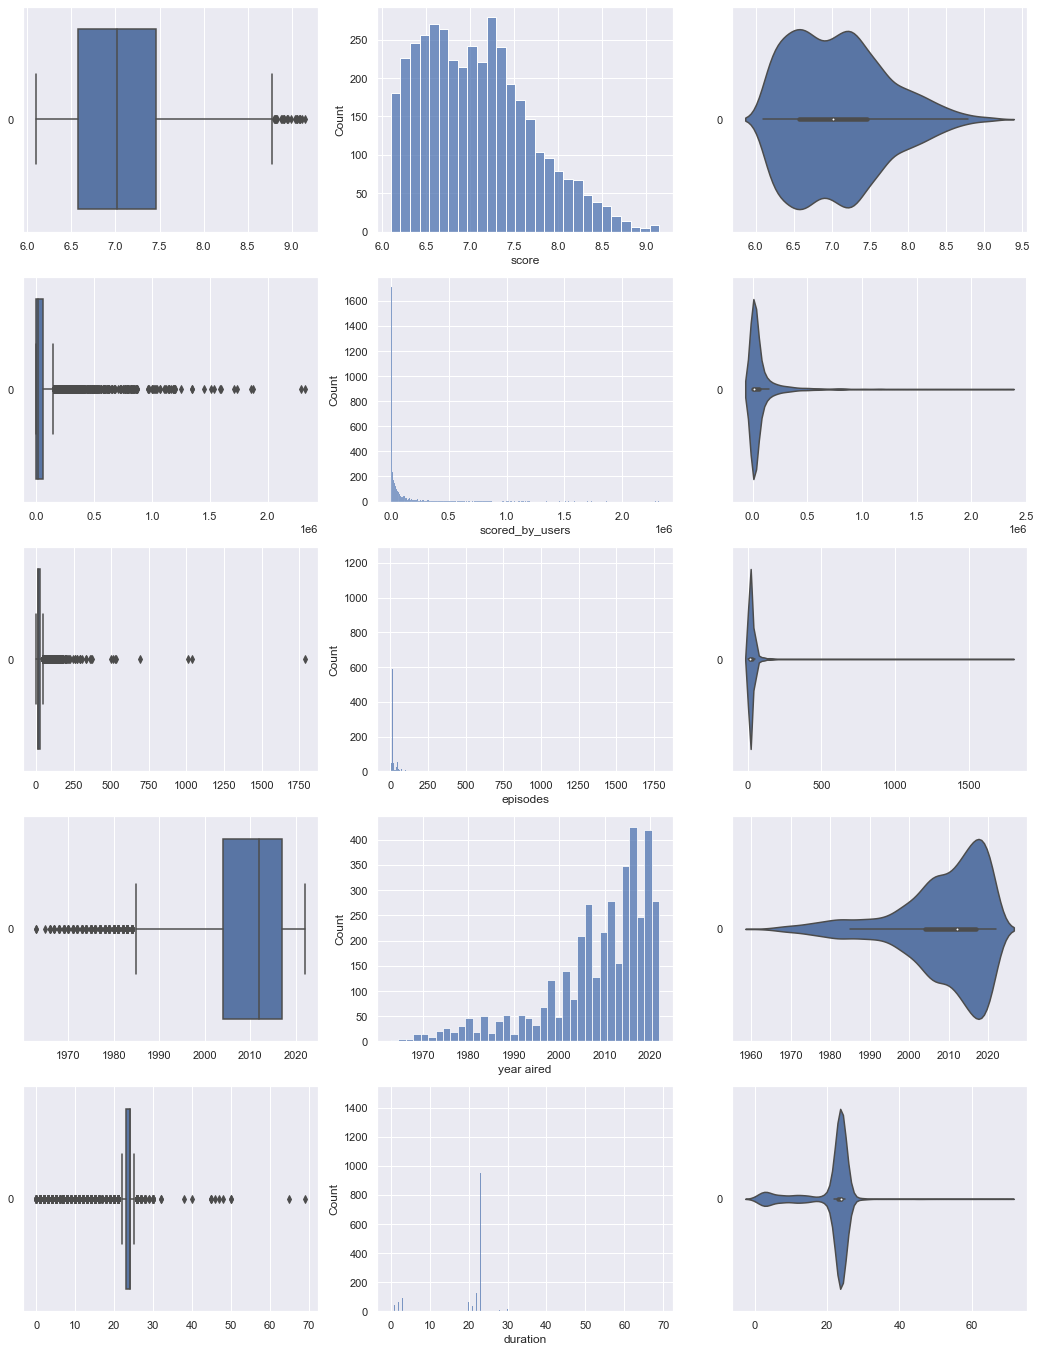

In [7]:
getNumericGraphs()

In [ ]:
getCorrMatrix()

### Top 10 Animes by Score

In [ ]:
data.sort_values('score', ascending=False).head(10).iloc[:,3:]

### Top 10 Worst Anime by Score

In [ ]:
data.sort_values('score', ascending=True).head(10).iloc[:,3:]

## Plot Analysis

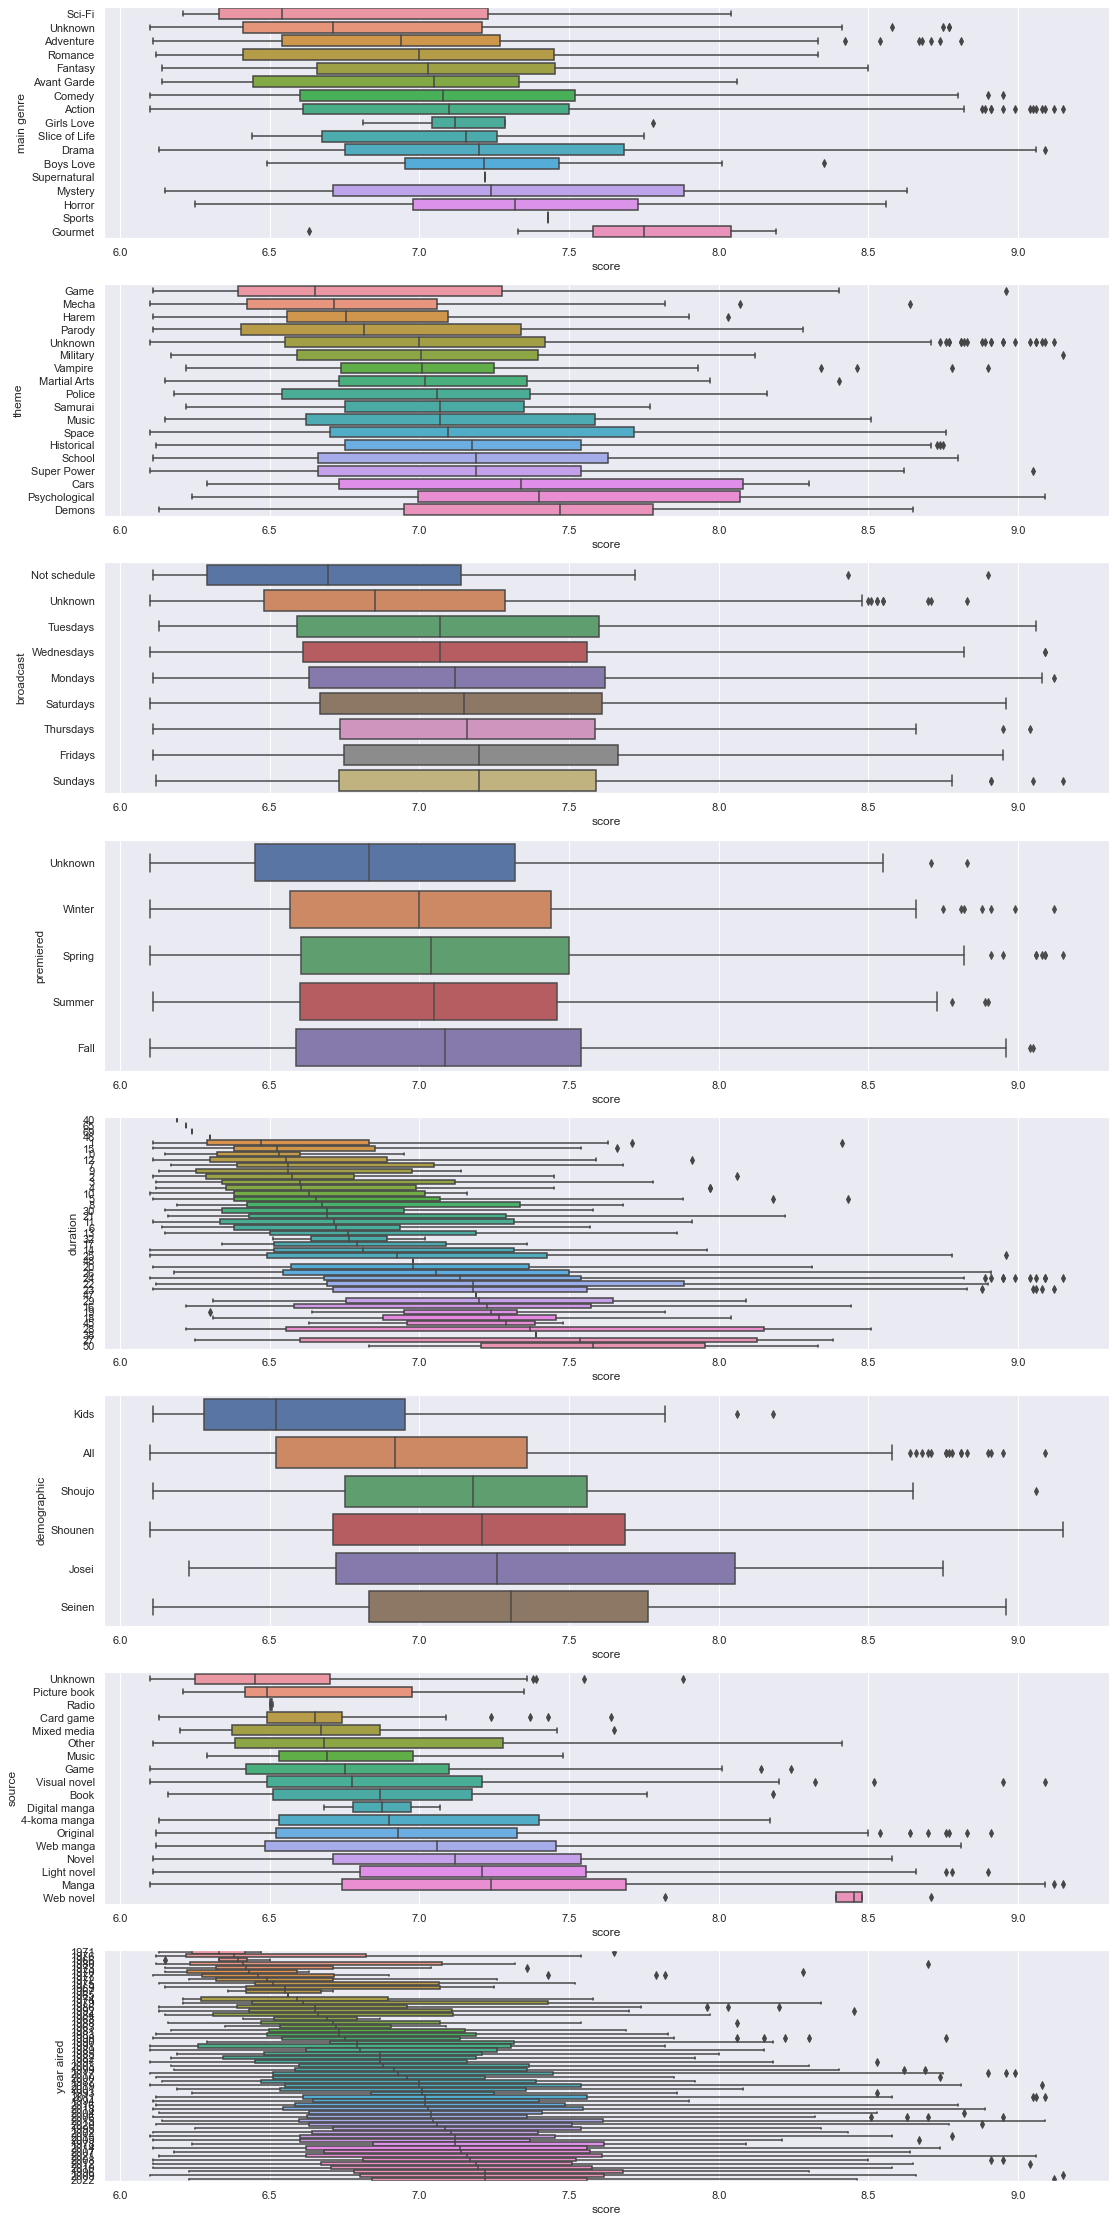

In [ ]:
f, axes = plt.subplots(8,1,figsize=(18,40))    
cat_data = pd.DataFrame(data[['main genre', 'theme', 'broadcast', 'premiered', 'duration', 'demographic', 'source', 'year aired', 'score']])
cat_var_data = pd.DataFrame(data[['main genre', 'theme', 'broadcast', 'premiered', 'duration', 'demographic', 'source', 'year aired']])

count = 0
for var in cat_var_data:
    sb.boxplot(data = cat_data, y=var, x='score', orient = 'h', ax=axes[count]
               , order = cat_data.groupby(var)['score'].median().sort_values().index)
    count+=1

## Remove outliers 

Index(['Unnamed: 0', 'Unnamed: 0.1', 'rank', 'title', 'score',
       'scored_by_users', 'type', 'episodes', 'status', 'year aired',
       'premiered', 'broadcast', 'producers', 'licensors', 'studios', 'source',
       'genres', 'main genre', 'theme', 'demographic', 'duration', 'rating',
       'popularity', 'url'],
      dtype='object')


KeyError: 0

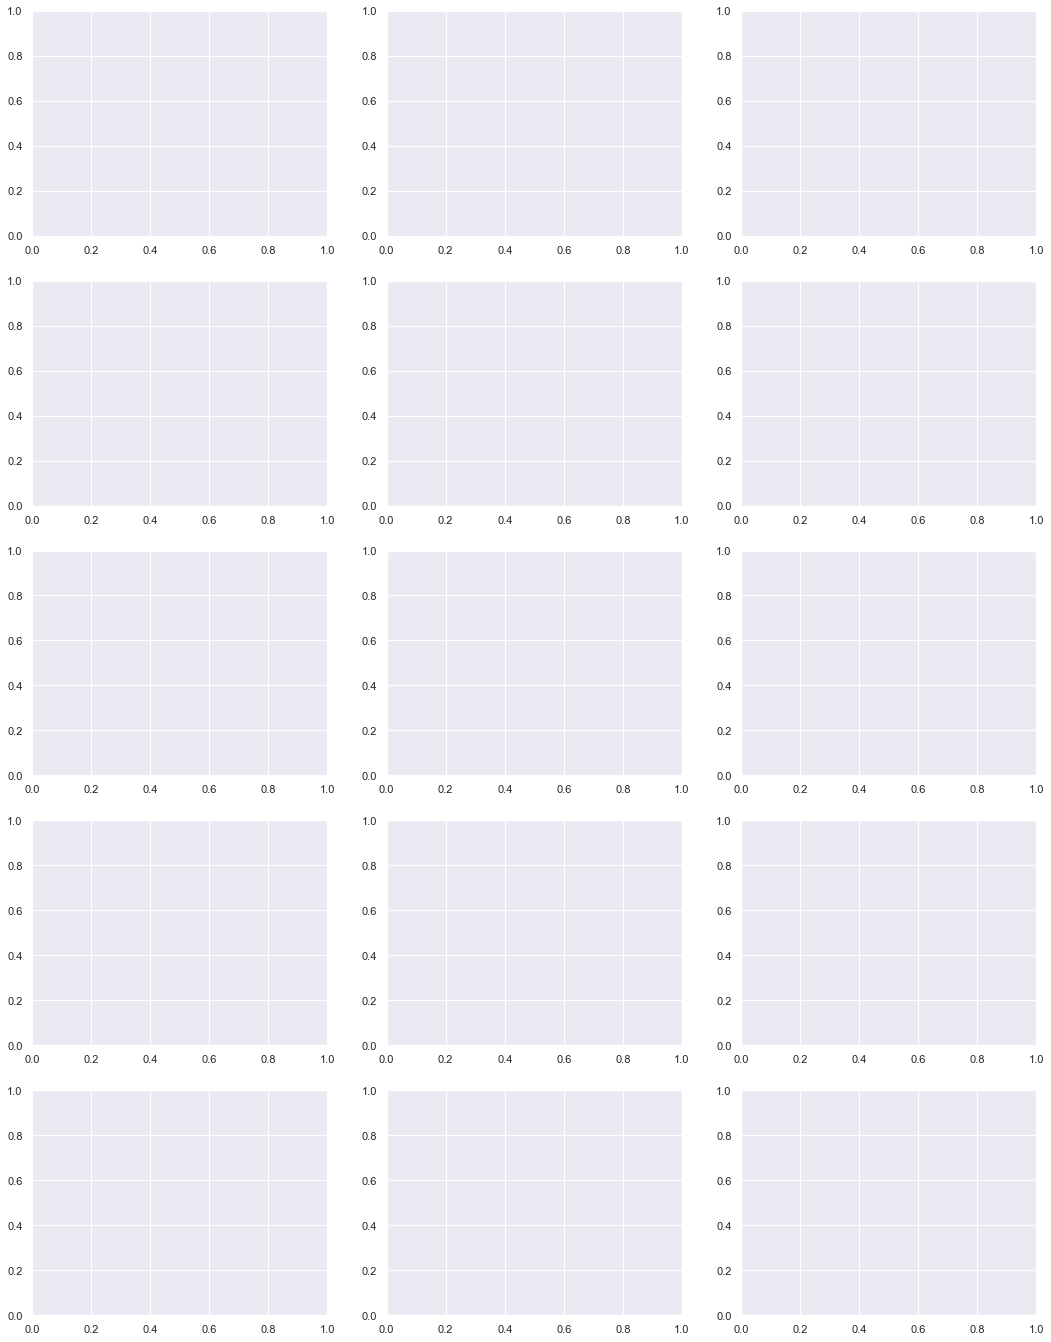

In [ ]:
def getOutliers(column):
    q1 = data[column].quantile(0.25)
    
    q3 = data[column].quantile(0.75)
    IQR = q3 - q1

    #get all df1 rows lower than q1-1.5 IQR and higher than q3+1.5IQR
    return data[(data[column] < (q1-1.5*IQR)) | (data[column] > (q3+1.5*IQR))]

df1 = getOutliers("episodes")
df1.shape
print(df1.columns)
#df2 = getOutliers("GrLivArea")

#df3 = pd.concat([df1, df2])

data = data[~data.index.isin(df1.index)]
getNumericGraphs()

Index(['score', 'scored_by_users', 'episodes', 'year aired', 'duration'], dtype='object')


,Unnamed: 0,Unnamed: 0.1,rank,title,score,scored_by_users,type,episodes,status,year aired,...,studios,source,genres,main genre,theme,demographic,duration,rating,popularity,url
1,1,1,2,Shingeki no Kyojin: The Final Season Part 2,9.12,188373,TV,12.0,Currently Airing,2022,...,MAPPA,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),198,https://myanimelist.net/anime/48583/Shingeki_n...
2,2,2,3,Steins;Gate,9.09,1161139,TV,24.0,Finished Airing,2011,...,White Fox,Visual novel,"Drama, Sci-Fi, Suspense",Drama,Psychological,All,24,PG-13 - Teens 13 or older,13,https://myanimelist.net/anime/9253/Steins_Gate
4,4,4,5,Shingeki no Kyojin Season 3 Part 2,9.08,1195629,TV,10.0,Finished Airing,2019,...,Wit Studio,Manga,"Action, Drama, Fantasy, Mystery",Action,Unknown,Shounen,23,R - 17+ (violence & profanity),32,https://myanimelist.net/anime/38524/Shingeki_n...
5,5,5,6,Fruits Basket: The Final,9.06,128247,TV,13.0,Finished Airing,2021,...,TMS Entertainment,Manga,"Drama, Romance, Slice of Life, Supernatural",Drama,Unknown,Shoujo,23,PG-13 - Teens 13 or older,629,https://myanimelist.net/anime/42938/Fruits_Bas...
8,9,9,10,Gintama': Enchousen,9.04,137219,TV,13.0,Finished Airing,2012,...,Sunrise,Manga,"Action, Comedy, Sci-Fi",Action,Unknown,Shounen,24,PG-13 - Teens 13 or older,684,https://myanimelist.net/anime/15417/Gintama__E...


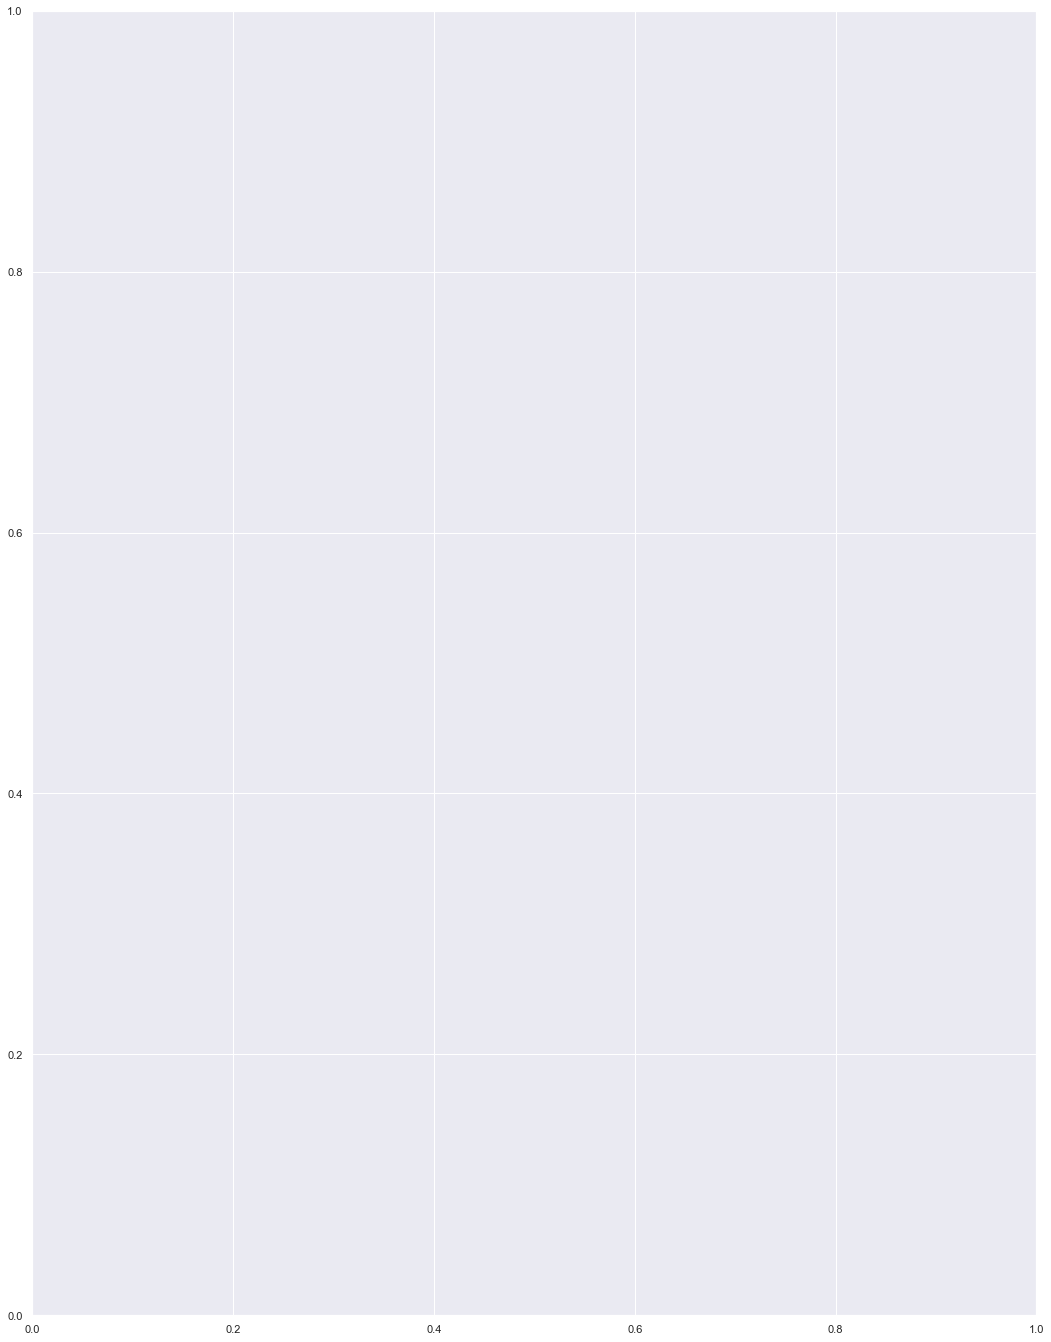

In [ ]:
newdata.describe().round(3)
f, axes = plt.subplots(1, 1, figsize=(18, 24))

#count = 0
#newdata.info()
#x.info()
print(x.columns)
#for var in x:
#    sb.boxplot(data = newdata[var], orient = "h")
#sb.histplot(data = newdata[var], ax = axes[count,1])
newdata.head()
#sb.violinplot(data = newdata[var], orient = "h", ax = axes[count,2])